In [1]:
import numpy as np
import tiles
import angles
import value_function
import algorithms
import policy
from env import ResetableEnv
from functools import partial
from tqdm import tqdm

In [2]:
import matplotlib.pyplot as plt


In [3]:
import gym
base_env = gym.make('Pendulum-v0')
env = ResetableEnv(base_env)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [12]:
# Initialisation of the hyperparameters
LEN_EPISODE = 200 # The task is non-episodic so we define the len of an episode as 200 (like openAI gym)
N_EPISODES = 200
GAMMA = .95
LAMBDA = 0.0
ALPHA = 1/4
N_TILES = 5
N_BINS = 10

In [13]:
# Initialize the tiles
tiles_intervals = tiles.get_intervals(N_TILES, N_BINS)
n_params = len(tiles_intervals) * N_BINS**2
print('{} parameters'.format(n_params))
w = (2*np.random.rand(n_params)-1)/1000
z = np.zeros((n_params, ))
alpha = ALPHA / N_TILES

500 parameters


In [14]:
v = value_function.linear_approx
g = value_function.linear_approx_grad

In [15]:
phi_0 = tiles.encode(np.array([[1.0, 0.0, 0.0]]), tiles_intervals)

In [16]:
v(phi_0, w)

-4.163211655327251e-05

In [17]:
from copy import deepcopy

In [18]:
l = []
for _ in tqdm(range(200)):
    # Loop
    obs = env.reset().reshape(1, -1)
    rews = 0
    for i in range(LEN_EPISODE):

        action = policy.policy(obs)
        phi = tiles.encode(obs, tiles_intervals)
        next_obs, rew, done, _ = env.renv.step(action)
        next_obs = next_obs.reshape(1, -1)
        next_phi = tiles.encode(next_obs, tiles_intervals)

        w, z = algorithms.update_tdlambda(w, z, phi, rew, next_phi, v, g, alpha_ = alpha, lambda_ = LAMBDA, gamma_ = GAMMA)
        obs = next_obs
        rews += rew
        
    l.append(deepcopy(v(phi_0, w)))

100%|██████████| 200/200 [00:15<00:00, 12.77it/s]


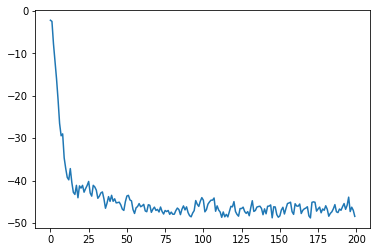

In [11]:
plt.figure()
plt.plot(l)
plt.show()

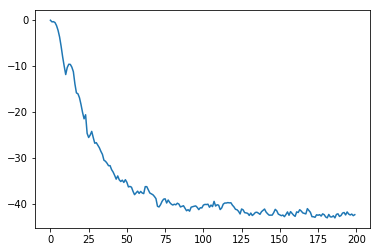

In [19]:
plt.figure()
plt.plot(l)
plt.show()